# Visualization

## 1. Libraries, Datasets
Here, you can use these install components, should you not have it

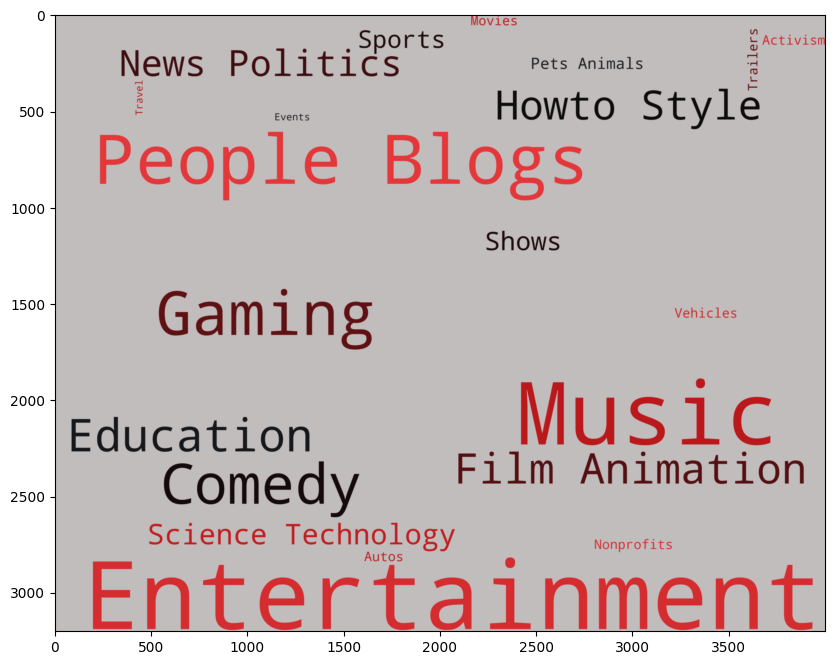

In [74]:
# !pip install Dash
# !pip install dash-bootstrap-components
# !pip install WordCloud
# !pip install pandas
# !pip install dash-bootstrap-components
# !pip install dash

In [61]:
from dash import Dash, dcc, Output, Input, html  
import dash_bootstrap_components as dbc    
import plotly.express as px
import pandas as pd                        
import webbrowser
from threading import Timer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO
from matplotlib.colors import LinearSegmentedColormap

In [62]:
#importing our preprocessed datasets

df = pd.read_csv("data/cleaned_global_youtube_statistics.csv")
df_country = pd.read_csv("data/cleaned_country_data.csv")

## 2. Initializing
Here we're doing all the functions we'll need while we're running the app. Also, we  initialize every variable we'll need

In [63]:
#we used a LOT of color for mainly aesthetic purposes
#here we collected all of them

font_dark="#0b090a"
font_light="#e4e3e4"

color_grey="#232a2f"
color_bloodred="#660708"
color_cornellred="#ba181b"
color_imperialred="#E5383B"
color_silver="#c2bdbd"
color_timbergrey="#d3d3d3"
color_platinum="#e4e3e4"


In [64]:
#initializing our Dash application

app = Dash(__name__, external_stylesheets=[dbc.themes.SANDSTONE])

In [65]:
#initializing a custom colormap for our wordcloud and a custom color scale for the heatmap

colors = [color_grey, font_dark, color_cornellred, color_imperialred]

custom_colormap = LinearSegmentedColormap.from_list("custom_colormap", colors)

custom_color_scale = [
    (0.0, color_bloodred),
    (1.0, font_light)
]

In [66]:
# function for making the wordcloud
def plot_wordcloud(text):
    #generating the wordcloud
    wordcloud = WordCloud(width=4000, height=3200, background_color=color_silver, margin=0, colormap=custom_colormap, min_font_size=20).generate(text)

    #making the plot wher we place the wordcloud
    plt.figure(figsize=(10, 8), facecolor=None)  # no background
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0) 
    buf = BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0, transparent=True)
    plt.close()
    buf.seek(0)
    image = base64.b64encode(buf.read()).decode('utf-8')
    return f"data:image/png;base64,{image}"

#we're initalizing one just to be loaded correctly

text = ' '.join(df['category'].dropna().astype(str))
wordcloud_image = plot_wordcloud(text)

In [67]:
#making a simple list containing the top 25 youtubers. this is a static list, it won't change whenever we change the channel type

top_list = html.Ul(
    [html.Li(f"{index + 1}. {row['Youtuber']}") for index, row in df.head(25).iterrows()],
    style={
        'maxHeight': '100%',
        'padding': '10px',
        'listStyleType': 'none',
        'color': font_light,
        'lineHeight': '2'  
    }
)

In [68]:
#we're collecting the column names for the dropdown menu

cols = [col for col in df_country.columns if col != 'Country']

In [69]:
#initializing some basic plots. We're gonna update it immediately

histogram = px.histogram(df, x='Country')
scatter_fig = px.scatter(df, x='Country', y='created_year')
scatter_fig2 = px.scatter(df, x='Country', y='created_year')
financial_scatter = px.scatter(df, x='Country', y='created_year')

In [70]:
#explanation for the visualization

string="Here, we analyze different categories of YouTube channels using various metrics. It is important to note that you can select the channel types for the graphs to visualize. The word cloud illustrates the types of videos uploaded on these channels."

## 3. Layout, Callbacks
Here you can see only two cells which are responsible for the app layout and the callbacks to provide an interactive visualization

In [71]:
#app layout with a lot of tweaking
app.layout = dbc.Container([
    dbc.Row([
        #header 1 for main title
        dbc.Col([
            html.H2("Best of The Best", style={'color': font_light, 'text-align': 'left'}),
            top_list
        ], width=2, style={
            'background-color': color_grey, 'margin': '0px', 'padding': '20px', 'height': '100vh', 'color': font_light,
            'box-shadow': '2px 2px 5px rgba(0, 0, 0, 0.1)', 'overflow': 'hidden', 'position': 'fixed', 'top': '0', 'left': '0', 'z-index': '1000'
        }),
        
        dbc.Col([   
            # header 2 for the left leaderboard
            dbc.Row([
                dbc.Col(html.H1("TOP YOUTUBERS OF 2023", style={'color': font_light, 'text-align': 'left', 'fontSize': '54px'}), width=10)
            ], style={
                'background-color': color_bloodred, 'padding': '10px', 'margin': '0px',
                'box-shadow': '2px 2px 5px rgba(0, 0, 0, 0.1)'
            }),

            # header 2 for the right, main component
            dbc.Row([
                dbc.Col(html.H2("Some Data Comparison Between Channel Types", style={'color': font_dark, 'text-align': 'left'}), width=10)
            ], style={
                'background-color': color_timbergrey, 'margin': '10px', 'padding': '20px',
                'box-shadow': '2px 2px 5px rgba(0, 0, 0, 0.1)'
            }),
            
            #short explanation for the data analysis
            dbc.Row([
                dbc.Col(html.P(string, style={'color': font_dark, 'text-align': 'left'}), width=10)
            ], style={
                'background-color': color_timbergrey, 'margin': '10px', 'padding': '20px',
                'box-shadow': '2px 2px 5px rgba(0, 0, 0, 0.1)'
            }),
            
            #Header 3 for section 1 and dropdown menu
            dbc.Row([
                dbc.Col(html.H3("Choose Channel Type!", style={'color': font_dark, 'text-align': 'left'}), width=9, style={'margin_right':'10px'}),
                dbc.Col(
                    dcc.Dropdown(
                        id='heatmap-dropdown',
                        options=[{'label': col, 'value': col} for col in cols],
                        value='Total',
                        style={"background-color": font_light, "color": font_dark}
                    ),
                    width=3
                )
            ], style={
                'background-color': color_timbergrey, 'margin': '10px', 'padding': '10px',
                'box-shadow': '2px 2px 5px rgba(0, 0, 0, 0.1)'
            }),

            #wordcloud and heatmap. On different screens this won't be perfect sadly. I couldn't figure out how to make it responsive.
            dbc.Row([
                dbc.Col(html.Img(id='wordcloud-image', src=wordcloud_image, 
                                 style={'width': '100%', 'display': 'block', 'margin': '0 auto', 'height': 'auto'})
                        , width=5),
                dbc.Col(
                    dcc.Graph(id='heatmap', style={"background-color": color_timbergrey, 'width': '100%', 'height': '100%'})
                , width=7, style={"background-color": color_timbergrey,'height': '100%', 'display': 'flex', 'alignItems': 'center', 'justifyContent': 'center', 'box-shadow': '2px 2px 5px rgba(0, 0, 0, 0.1)'})
            ], style={
                'margin': '20px', 'display': 'flex', 'alignItems': 'stretch'
            }),

            # header 3 for section 2
            dbc.Row(dbc.Col(html.H3("Channel Creation", style={'color': font_dark, 'text-align': 'left'}), width=10), 
                    style={
                        'background-color': color_timbergrey, 'margin': '10px',
                        'box-shadow': '2px 2px 5px rgba(0, 0, 0, 0.1)'
                    }),

            #histogram
            dbc.Row([
                dbc.Col([
                    dcc.Graph(id= 'histogram', figure=histogram,style={'padding':'0px', 'margin': '10px'}),  # Histogram on top right
                ], width=12)
            ]),  # <- Added closing bracket here

            #header 3 for section 3
            dbc.Row([
                dbc.Col(html.H3("Let's Talk About Subscribers!", style={'color': font_dark, 'text-align': 'left'}), width=10)
            ], style={
                'background-color': color_timbergrey, 'margin': '10px',
                'box-shadow': '2px 2px 5px rgba(0, 0, 0, 0.1)'
            }),

            #scatter plots for section 3
            dbc.Row([
                dbc.Col([
                    dcc.Graph(id='scatter_fig', figure=scatter_fig),  # Histogram on top right
                ], width=6),
                dbc.Col([
                    dcc.Graph(id='scatter_fig2', figure=scatter_fig2),  # Histogram on top right
                ], width=6)
            ], style={'margin': '0px'}),

            #header 3 for section 4
            dbc.Row(dbc.Col(html.H3("Some Financial Insight", style={'color': font_dark, 'text-align': 'left'}), width=10), 
                    style={
                        'background-color': color_timbergrey, 'margin': '10px',
                        'box-shadow': '2px 2px 5px rgba(0, 0, 0, 0.1)'
                    }),
            
            #scatter plot for section 4
            dbc.Row([
                dbc.Col([
                    dcc.Graph(id= 'financial_scatter', figure=financial_scatter, style={'padding':'0px', 'margin': '10px'}),
                ], width=12)
            ])
        ], width=10, style={
            'background-color': color_silver, 'margin-left': '16.666667%', 'box-shadow': '2px 2px 5px rgba(0, 0, 0, 0.1)', 'overflow-y': 'scroll', 'padding-left': '10px', 'padding-right': '10px'
        })
    ])
], fluid=True, style={'background-color': color_silver, 'margin': '0px'})



In [72]:
#callbacks to make some interactive graphs. Also, we're doing the real initialization here
#all change when we set a new channel type, all will filter the data and show only the related one on the graph except the heatmap 

#heatmap0
@app.callback(
    Output('heatmap', 'figure'),
    Input('heatmap-dropdown', 'value')
)
#here we're using the df_country dataset instead of the original one
def update_heatmap(column_name):
    heatmap_fig = px.choropleth(
        data_frame=df_country,
        locations='Country',
        locationmode="country names",
        color=column_name,
        color_continuous_scale=custom_color_scale
    )
    heatmap_fig.update_layout(
        paper_bgcolor=color_timbergrey,
        plot_bgcolor=color_timbergrey,
        margin=dict(l=20, r=20, t=40, b=20)
    )

    heatmap_fig.update_geos(
        bgcolor=color_timbergrey,  # Background color of the map
        landcolor=color_silver,  # Color for the continents/land
        lakecolor=color_timbergrey,
        showland=True
    )
    
    return heatmap_fig

#scatter plot 1: comparing video views to subscribers
@app.callback(
    Output('scatter_fig', 'figure'),
    Input('heatmap-dropdown', 'value')
)
def update_scatter_fig(value):
    df2=df

    if (value!='Total'): df2=df[df['channel_type']==value] #the filtering
    
    scatter_fig = px.scatter(
        df2,
        x='video views',
        y='subscribers',
        labels={'video views': 'Total Video Views', 'subscribers': 'Subscribers'},
        title='Subscribers vs Total Video Views',
        template='plotly_white',
        hover_name='Youtuber' #some extra information for the tooltip 
    )
    scatter_fig.update_layout(
        paper_bgcolor=color_timbergrey,
        plot_bgcolor=color_timbergrey,
        margin=dict(l=20, r=20, t=40, b=20)
    )
    
    scatter_fig.update_traces(marker=dict(color=color_cornellred))
    
    return scatter_fig

#scatter plot 2 : comparing video uploads to subscribers
@app.callback(
    Output('scatter_fig2', 'figure'),
    Input('heatmap-dropdown', 'value')
)
def update_scatter_fig2(value):
    df2=df

    if (value!='Total'): df2=df[df['channel_type']==value]
    
    scatter_fig2 = px.scatter(
        df2,
        x='uploads',
        y='subscribers',
        labels={'uploads': 'Total Video Uploads', 'subscribers': 'Subscribers'},
        title='Subscribers vs Total Video Uploads',
        template='plotly_white',
        hover_name='Youtuber'
    )
    scatter_fig2.update_layout(
        paper_bgcolor=color_timbergrey,
        plot_bgcolor=color_timbergrey,
        margin=dict(l=20, r=20, t=40, b=20)
    )
    
    scatter_fig2.update_traces(marker=dict(color=color_cornellred))
    
    return scatter_fig2

# financial scatter: comparing (country's highest monthly earnings to unemployment rate) we're looking for a possible correlation
@app.callback(
    Output('financial_scatter', 'figure'),
    Input('heatmap-dropdown', 'value')
)
def update_financial_scatter(value):
    df2=df

    if (value!='Total'): df2=df[df['channel_type']==value]
    
    financial_scatter = px.scatter(
        df2,
        x='Unemployment rate',
        y='highest_monthly_earnings',
        labels={'highest_monthly_earnings': 'Highest Monthly Earnings', 'Unemployment rate': 'Unemployment rate'},
        title='Highest Monthly Earnings vs Country Unemployment Rate',
        template='plotly_white',
        hover_name='Youtuber'
    )
    financial_scatter.update_layout(
        paper_bgcolor=color_timbergrey,
        plot_bgcolor=color_timbergrey,
        margin=dict(l=20, r=20, t=40, b=20)
    )
    
    financial_scatter.update_traces(marker=dict(color=color_cornellred))
    
    return financial_scatter

#histogram for creation year
@app.callback(
    Output('histogram', 'figure'),
    Input('heatmap-dropdown', 'value')
)
def update_histogram(value):
    df2=df

    if (value!='Total'): df2=df[df['channel_type']==value]
    
    histogram = px.histogram(
        df2,
        y='created_year',
        labels={'created_year': 'Year Created'},
        title='Histogram of Created Year',
        template='plotly_white'
    )

    histogram.update_layout(
        paper_bgcolor=color_timbergrey,
        plot_bgcolor=color_timbergrey,
        margin=dict(l=20, r=20, t=40, b=20)
    )

    histogram.update_traces(marker=dict(color=color_cornellred))
    histogram.update_yaxes(range=[2005, df['created_year'].max()])
    
    return histogram

#wordcloud image. this one is quite slow, it will update in 5 seconds.
@app.callback(
    Output('wordcloud-image', 'src'),
    Input('heatmap-dropdown', 'value')
)
def update_wordcloud(value):
    text=""
    if (value=='Total'):
        text = ' '.join(df['category'].dropna().astype(str))  # Modify as needed based on `value`
        
    else:
        df2=df[df['channel_type']==value]
        text = ' '.join(df2['category'].dropna().astype(str))  # Modify as needed based on `value`  
    return plot_wordcloud(text)

## 4. Running the app
Simple as that

In [73]:
#main. we're opening a new browser, and then start to run the server

if __name__ == '__main__':
    webbrowser.open_new("http://127.0.0.1:8054/")
    app.run_server(debug=True, port=8054)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[72], line 162, in update_wordcloud(value='Total')
    160     df2=df[df['channel_type']==value]
    161     text = ' '.join(df2['category'].dropna().astype(str))  # Modify as needed based on `value`  
--> 162 return plot_wordcloud(text)
        text = 'Music Film & Animation Entertainment Education Shows People & Blogs Gaming People & Blogs Entertainment Music Sports People & Blogs Shows Howto & Style Music Music Music Entertainment Education Music Education Music Shows Music Sports Film & Animation Music Music Music News & Politics Music Music Entertainment Film & Animation Music Education Music Music Education Gaming Music Entertainment Entertainment Music Gaming Gaming Entertainment Entertainment Entertainment Entertainment Music Comedy People & Blogs Music People & Blogs Film & Animation Entertainment Music Shows Entertainme